https://towardsdatascience.com/in-12-minutes-stocks-analysis-with-pandas-and-scikit-learn-a8d8a7b50ee7


In [3]:
import pandas as pd
import datetime
import pandas_datareader.data as web
from pandas import Series, DataFrame
from pandas.plotting import scatter_matrix


start = datetime.datetime(2013, 1, 1)
end = datetime.datetime(2019, 11, 16)



In [4]:
df = web.DataReader("TRAN.BA", 'yahoo', start, end)
df.tail()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2019-11-11,22.400000,20.900000,22.400000,21.25,398041.0,21.25
2019-11-12,22.000000,20.150000,21.200001,21.85,733483.0,21.85
2019-11-13,21.850000,20.750000,21.799999,20.85,256687.0,20.85
2019-11-14,21.299999,19.049999,20.600000,19.50,351971.0,19.50
2019-11-15,20.299999,19.049999,19.750000,19.60,301265.0,19.60


In [5]:
close_px = df['Adj Close']
mavg = close_px.rolling(window=100).mean()

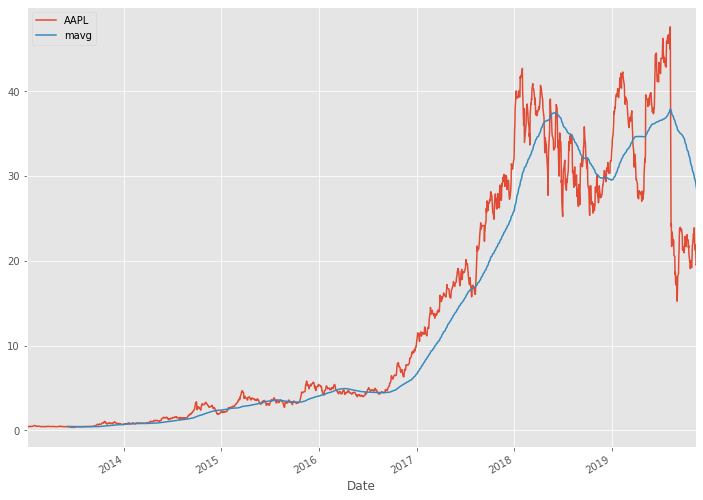

In [17]:
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import style
from matplotlib.pyplot import figure

# Adjusting the size of matplotlib
import matplotlib as mpl
mpl.rc('figure', figsize=(12, 9))
mpl.__version__

# Adjusting the style of matplotlib
style.use('ggplot')

close_px.plot(label='AAPL')
mavg.plot(label='mavg')
plt.legend()

Expected Return measures the mean, or expected value, of the probability distribution of investment returns. The expected return of a portfolio is calculated by multiplying the weight of each asset by its expected return and adding the values for each investment — Investopedia.


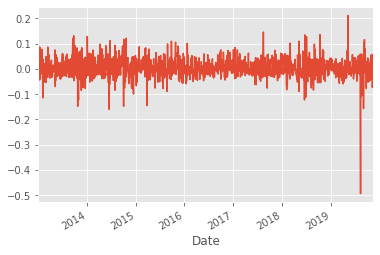

In [7]:
rets = close_px / close_px.shift(1) - 1
rets.plot(label='return')

Símbolo
ALUA.BA
APBR.BA
BBAR.BA
BMA.BA
BYMA.BA
CEPU.BA
COME.BA
CRES.BA
CVH.BA
DGCU2.BA
EDN.BA
GGAL.BA
LOMA.BA
METR.BA
MIRG.BA
PAMP.BA
SUPV.BA
TECO2.BA
TGN04.BA
TGSU2.BA
TRAN.BA
TXAR.BA
VALO.BA
YPFD.BA


In [8]:
#dfcomp = web.DataReader(['ALUA.BA', 'APBR.BA', 'BBAR.BA', 'BMA.BA', 'BYMA.BA', 'CEPU.BA', 'COME.BA', 'CRES.BA', 'CVH.BA', 'DGCU2.BA', 'EDN.BA', 'GGAL.BA', 'LOMA.BA', 'METR.BA', 'MIRG.BA', 'PAMP.BA', 'SUPV.BA', 'TECO2.BA',  'TGSU2.BA', 'TRAN.BA', 'TXAR.BA', 'VALO.BA', 'YPFD.BA'],'yahoo',start=start,end=end)['Adj Close']

dfcomp = web.DataReader(['ALUA.BA', 'EDN.BA', 'LOMA.BA', 'METR.BA', 'MIRG.BA', 'PAMP.BA', 'SUPV.BA', 'TECO2.BA',  'TGSU2.BA', 'TRAN.BA', 'TXAR.BA', 'YPFD.BA'],'yahoo',start=start,end=end)['Adj Close']

Correlation Analysis — Does one competitor affect others?
We can analyse the competition by running the percentage change and correlation function in pandas. Percentage change will find how much the price changes compared to the previous day which defines returns. Knowing the correlation will help us see whether the returns are affected by other stocks’ returns

In [9]:
retscomp = dfcomp.pct_change()
corr = retscomp.corr()



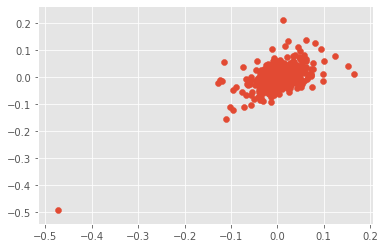

In [10]:
plt.scatter(retscomp['LOMA.BA'], retscomp['TRAN.BA'])


Let us further improve our analysis by plotting the scatter_matrix to visualize possible correlations among competing stocks. At the diagonal point, we will run Kernel Density Estimate (KDE). KDE is a fundamental data smoothing problem where inferences about the population are made, based on a finite data sample. It helps generate estimations of the overall distributions.

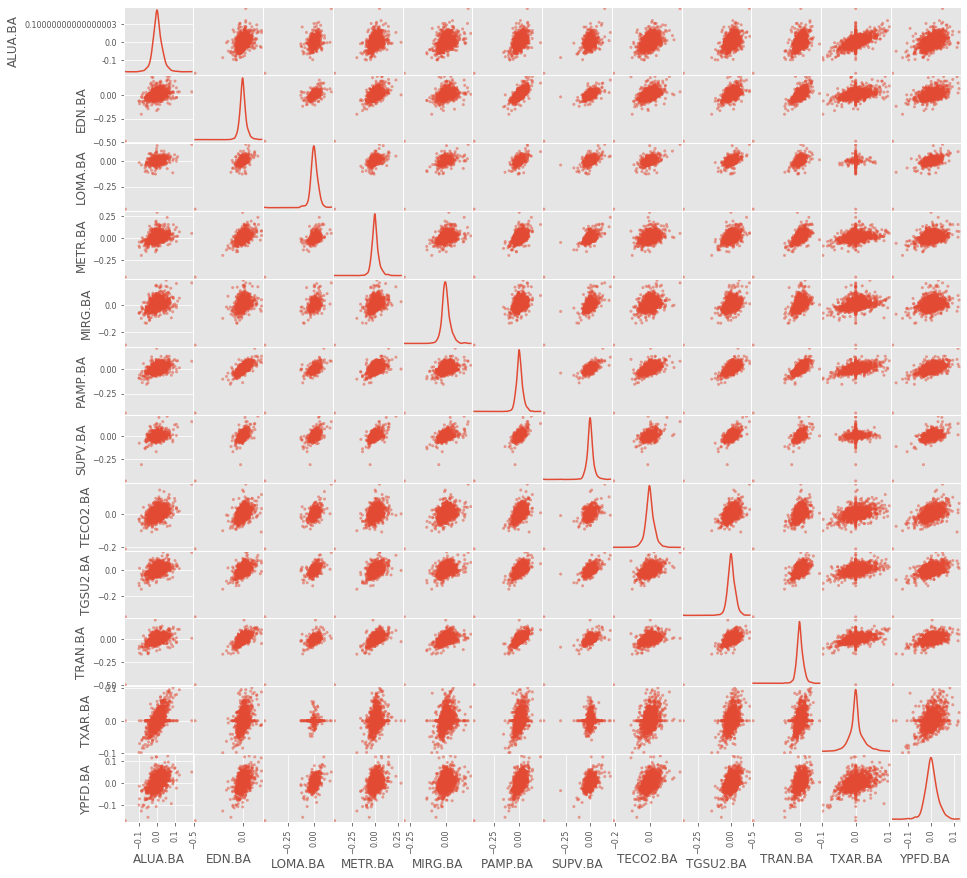

In [11]:
from pandas.plotting import scatter_matrix
scatter_matrix(retscomp, diagonal='kde', figsize=(15, 15));

From here we could see most of the distributions among stocks which approximately positive correlations.
To prove the positive correlations, we will use heat maps to visualize the correlation ranges among the competing stocks. Notice that the lighter the color, the more correlated the two stocks are.

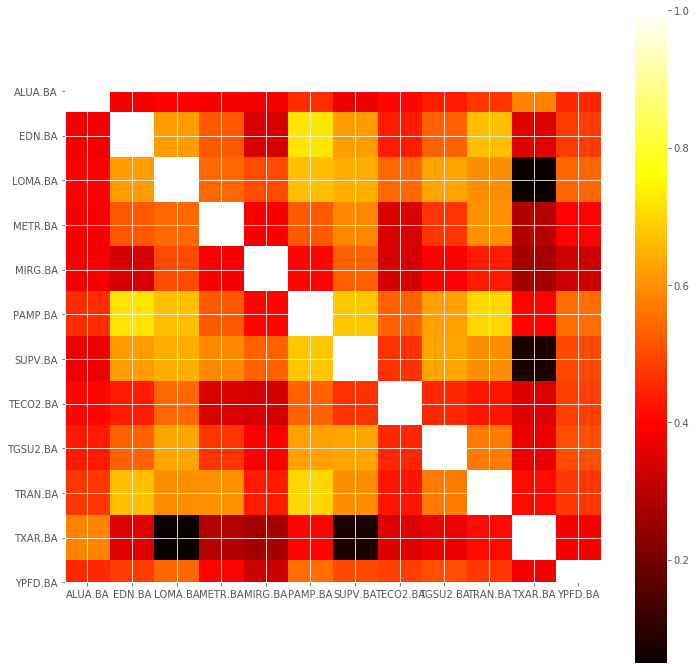

In [21]:
plt.figure(figsize=(12, 12))
plt.imshow(corr, cmap='hot', interpolation='none')
plt.colorbar()
plt.xticks(range(len(corr)), corr.columns)
plt.yticks(range(len(corr)), corr.columns);

From the Scatter Matrix and Heatmap, we can find great correlations among the competing stocks. However, this might not show causality, and could just show the trend in the technology industry rather than show how competing stocks affect each other.
Stocks Returns Rate and Risk
Apart from correlation, we also analyse each stock’s risks and returns. In this case we are extracting the average of returns (Return Rate) and the standard deviation of returns (Risk).

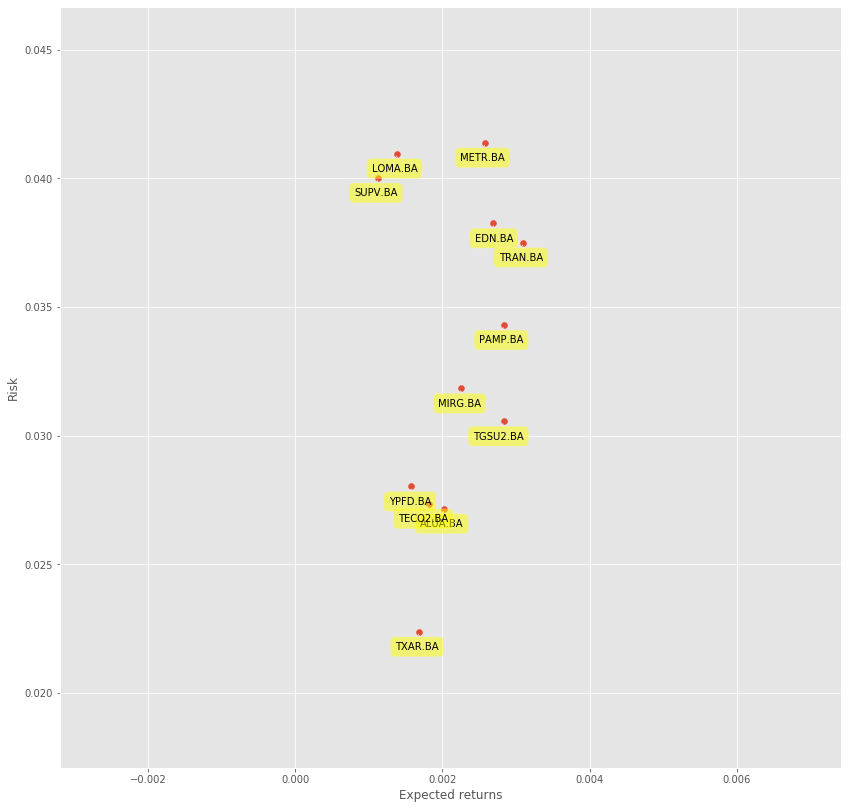

In [23]:
plt.figure(figsize=(14, 14))
plt.scatter(retscomp.mean(), retscomp.std())
plt.xlabel('Expected returns')
plt.ylabel('Risk')
for label, x, y in zip(retscomp.columns, retscomp.mean(), retscomp.std()):
    plt.annotate(
        label, 
        xy = (x, y), xytext = (20, -20),
        textcoords = 'offset points', ha = 'right', va = 'bottom',
        bbox = dict(boxstyle = 'round,pad=0.5', fc = 'yellow', alpha = 0.5),
        arrowprops = dict(arrowstyle = '->', connectionstyle = 'arc3,rad=0'))

Now you could view this neat chart of risk and return comparisons for competing stocks. Logically, you would like to minimize the risk and maximize returns. Therefore, you would want to draw the line for your risk-return tolerance (The red line). You would then create the rules to buy those stocks under the red line (MSFT, GE, and IBM) and sell those stocks above the red line (AAPL and GOOG). This red line showcases your expected value threshold and your baseline for buy/sell decision.

